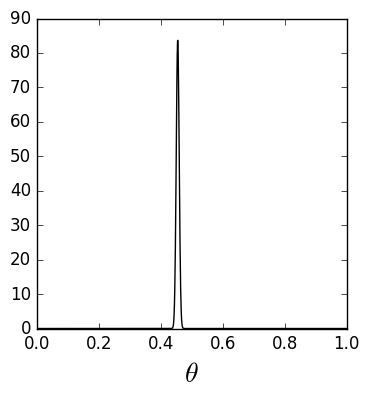

In [22]:
%matplotlib inline
#posteior distribution of binomial data
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

n = 11000
y = 5000

theta = np.arange(0,1,0.001)
p = stats.beta.pdf(theta,y+1,n-y+1)

fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.plot(theta,p,'k-')
ax.set_xlabel(r'$\theta$',fontsize=20)
fig.show()

In [29]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import astropy.io.fits as fits

def loadData(filename):
    '''
    Read fits data
    
    '''
    tchfits = fits.open(filename)
    tabl = tchfits[1].data
    return tabl


N_star=28, N_gal=22

First 50 sources: E(theta|y)=0.56
N_star=33, N_gal=17

Second 50 sources: E(theta|y)=0.65
Second 50 sources with the prior from the first 50: E(theta|y)=0.61


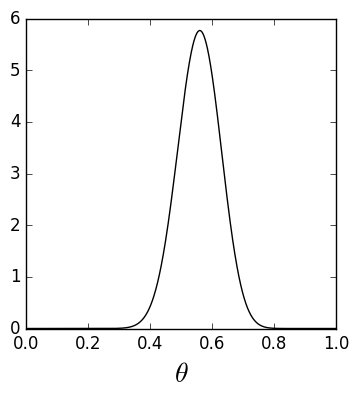

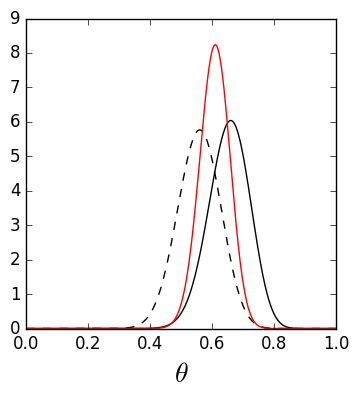

In [24]:
# star/galaxy ratio in a small field of sky
filename = 'sdss_field.fits'
sdss = loadData(filename)

#the first 50 data
types = sdss.type[0:50]
Nstar = np.sum(types==3)
N = 50
print 'N_star=%(d1)d, N_gal=%(d2)d\n' % {'d1':Nstar,'d2':np.sum(types==6)}
E_th_y = (Nstar+1.)/(N+2.)
print r'First 50 sources: E(theta|y)=%(n).2f' % {'n': E_th_y}

#with uniform distribution
theta = np.arange(0,1,0.001)
p = stats.beta.pdf(theta,Nstar+1,N-Nstar+1)

fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.plot(theta,p,'k-')
ax.set_xlabel(r'$\theta$',fontsize=20)
fig.show()

#with conjugate prior determined by the first 50 and use the 51:100 data
alpha = Nstar+1
beta = N-Nstar+1

types = sdss.type[50:100]
Nstar2 = np.sum(types==3)
N2 = 50
print 'N_star=%(d1)d, N_gal=%(d2)d\n' % {'d1':Nstar2,'d2':np.sum(types==6)}
E_th_y = (Nstar2+1.)/(N2+2.)
print r'Second 50 sources: E(theta|y)=%(n).2f' % {'n': E_th_y}
#uniform prior
p2_0 = stats.beta.pdf(theta,Nstar2+1,N2-Nstar2+1)
#conjugate prior
p2 = stats.beta.pdf(theta,Nstar2+alpha,N2-Nstar2+beta)
print r'Second 50 sources with the prior from the first 50: E(theta|y)=%(n).2f' %\
    {'n': (Nstar2+alpha)/np.float(N2+alpha+beta)}
fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.plot(theta,p,'k--')
ax.plot(theta,p2_0,'k-')
ax.plot(theta,p2,'r-')
ax.set_xlabel(r'$\theta$',fontsize=20)
fig.show()

N_star=363, N_gal=187

550 sources with conjugate prior: theta=0.6594
550 sources: theta=0.6600


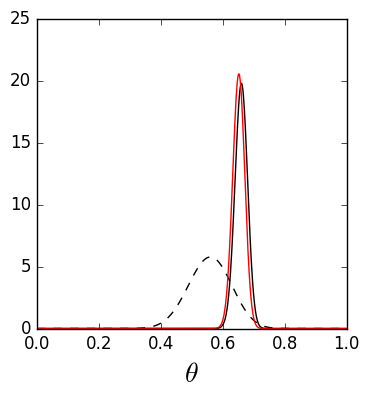

In [25]:
#when data increases prior play less role
alpha = Nstar+1
beta = N-Nstar+1

types = sdss.type[50:600]
Nstar2 = np.sum(types==3)
N2 = 550
print 'N_star=%(d1)d, N_gal=%(d2)d\n' % {'d1':Nstar2,'d2':np.sum(types==6)}
E_th_y = (Nstar2+1.)/(N2+2.)
print '550 sources with conjugate prior: theta=%(d1).4f' % {'d1':E_th_y}
print '550 sources: theta=%(d1).4f' % {'d1':Nstar2/550.}



#uniform prior
p2_0 = stats.beta.pdf(theta,Nstar2+1,N2-Nstar2+1)
#conjugate prior
p2 = stats.beta.pdf(theta,Nstar2+alpha,N2-Nstar2+beta)

fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.plot(theta,p,'k--')
ax.plot(theta,p2_0,'k-')
ax.plot(theta,p2,'r-')
ax.set_xlabel(r'$\theta$',fontsize=20)
fig.show()

1316.84096117


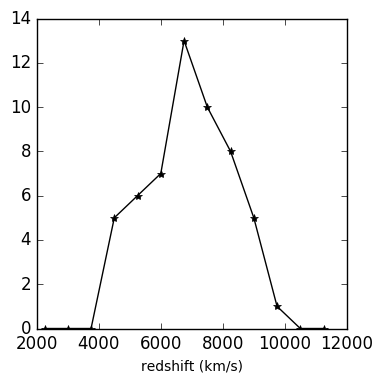

In [62]:
## the mean redshift of Coma cluster
filename = 'ComaCluster.fits'
coma = loadData(filename)
cz = coma.czA[(coma.czA<20000) & (coma.czA>0)]
sig_cz = np.var(cz)
print np.sqrt(sig_cz)
zgrid =np.arange(2000.,12000.,750.)
h, xedge = np.histogram(cz, bins=zgrid)
fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.plot(zgrid[0:-1]+250.,h,'k*-')
ax.set_xlabel('redshift (km/s)')
fig.show()

In [70]:
#known sigma ask for mean redshift
import scipy.stats as stats
import scipy.special as special

sig = 1317
tao_0 = 1000.0
mu_0 = 6925.0
mu_1 = (1./tao_0**2*mu_0+1./sig**2*np.mean(cz))/(1./tao_0**2+1./sig**2)
tao_1 = 1/(1./tao_0**2+1./sig**2)
print np.mean(cz), mu_1, np.sqrt(tao_1)



7004.74545455 6954.16283611 796.430135543


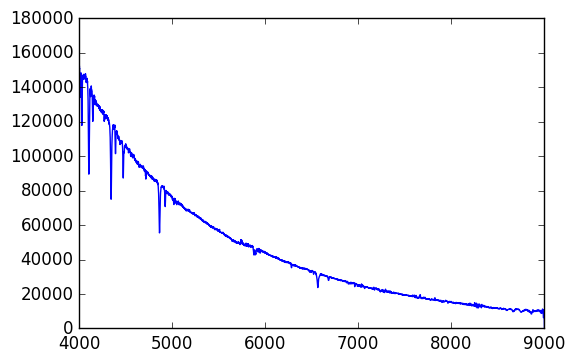

In [32]:
# measure the redshift from an absorption line
filename = '351110104.fits'
tchfits = fits.open(filename)
log_wv0 = tchfits[0].header['CRVAL1']
log_dwv = tchfits[0].header['CD1_1']

sp = tchfits[0].data

N = len(sp[0,:])
wv = 10**(log_wv0+np.arange(0,N,1)*log_dwv)

fig = plt.figure(figsize=[6,4])
ax = fig.add_subplot(111)
ax.plot(wv,sp[0,:])
ax.set_xlim([4000,9000])
fig.show()

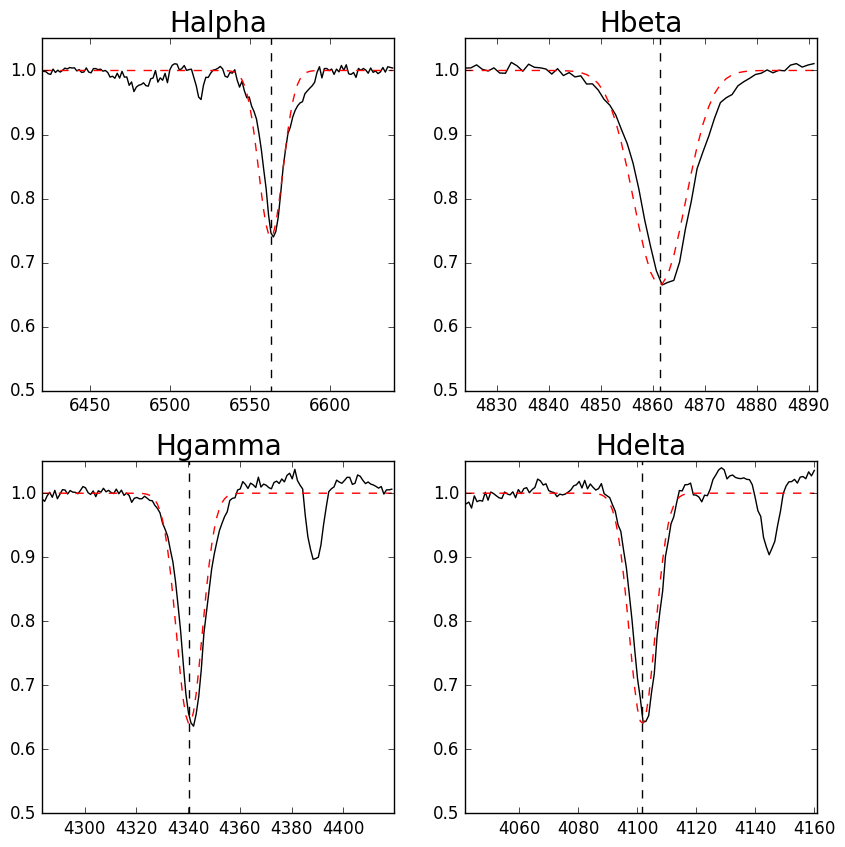

In [33]:
Ha_0 = 6562.85
Hb_0 = 4861.36
Hg_0 = 4340.46
Hd_0 = 4101.74

Ha_cont = [6420.00,6455.00,6600.00,6640.00]
Hb_cont = [4823.875,4847.875,4876.625,4891.625]
Hg_cont = [4283.50,4319.75,4367.25,4419.75]
Hd_cont = [4041.60,4079.75,4128.50,4161.00]

def normSpec(wv,sp,cont):
    ind_cont1 = (wv>=cont[0]) & (wv<=cont[1])
    ind_cont2 = (wv>=cont[2]) & (wv<=cont[3])
    fc1 = np.mean(sp[ind_cont1])
    wv1 = np.mean(wv[ind_cont1])
    fc2 = np.mean(sp[ind_cont2])
    wv2 = np.mean(wv[ind_cont2])
    fc = (fc2-fc1)/(wv2-wv1)*(wv-wv1)+fc1
    normsp = sp/fc
    return normsp

def gauss(x,A,mu,sig):
    return 1.-A*np.exp(-(x-mu)**2/(2*sig**2))

#normalize Halpha
normsp_Ha = normSpec(wv,sp[0,:],Ha_cont)
ind_Ha = (wv>=Ha_cont[0]) & (wv<=Ha_cont[3])
normsp_Ha = normsp_Ha[ind_Ha]
wv_Ha = wv[ind_Ha]
#normalize Hbeta
normsp_Hb = normSpec(wv,sp[0,:],Hb_cont)
ind_Hb = (wv>=Hb_cont[0]) & (wv<=Hb_cont[3])
normsp_Hb = normsp_Hb[ind_Hb]
wv_Hb = wv[ind_Hb]
#normalize Hgamma
normsp_Hg = normSpec(wv,sp[0,:],Hg_cont)
ind_Hg = (wv>=Hg_cont[0]) & (wv<=Hg_cont[3])
normsp_Hg = normsp_Hg[ind_Hg]
wv_Hg = wv[ind_Hg]
#normalize Hdelta
normsp_Hd = normSpec(wv,sp[0,:],Hd_cont)
ind_Hd = (wv>=Hd_cont[0]) & (wv<=Hd_cont[3])
normsp_Hd = normsp_Hd[ind_Hd]
wv_Hd = wv[ind_Hd]

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(221)
ax.plot(wv_Ha,normsp_Ha,'k-')
y = gauss(wv_Ha,0.26,Ha_0,7.5)
ax.plot(wv_Ha,y,'r--')
ax.plot([Ha_0,Ha_0],[0.,1.1],'k--')
ax.set_ylim([0.5,1.05])
ax.set_xlim([Ha_cont[0],Ha_cont[3]])
ax.set_title('Halpha',fontsize=20)

ax = fig.add_subplot(222)
ax.plot(wv_Hb,normsp_Hb,'k-')
y = gauss(wv_Hb,0.335,Hb_0,5.0)
ax.plot(wv_Hb,y,'r--')
ax.plot([Hb_0,Hb_0],[0.0,1.1],'k--')
ax.set_ylim([0.5,1.05])
ax.set_xlim([Hb_cont[0],Hb_cont[3]])
ax.set_title('Hbeta',fontsize=20)

ax = fig.add_subplot(223)
ax.plot(wv_Hg,normsp_Hg,'k-')
y = gauss(wv_Hg,0.36,Hg_0,5.0)
ax.plot(wv_Hg,y,'r--')
ax.plot([Hg_0,Hg_0],[0.0,1.1],'k--')
ax.set_ylim([0.5,1.05])
ax.set_xlim([Hg_cont[0],Hg_cont[3]])
ax.set_title('Hgamma',fontsize=20)

ax = fig.add_subplot(224)
ax.plot(wv_Hd,normsp_Hd,'k-')
y = gauss(wv_Hd,0.36,Hd_0,4.4)
ax.plot(wv_Hd,y,'r--')
ax.plot([Hd_0,Hd_0],[0.0,1.1],'k--')
ax.set_ylim([0.5,1.05])
ax.set_xlim([Hd_cont[0],Hd_cont[3]])
ax.set_title('Hdelta',fontsize=20)

fig.show()